# Mann Whitney - Methods in R

([**Return to Week 3 index.**](http://localhost:8890/tree/Desktop/BIOM262/week03#))


## Table of Contents
[**1. Normalized data from littermates**](#1.-Normalized-data-from-littermates)  
[**2. Non-parametric tests for Adamts13 expression from RT-qPCR data**](#2.-Non-parametric-tests-for-Adamts13-expression-from-RT-qPCR-data)  
[**3. Non-parametric tests with multiple groups:**](##-3.-Non-parametric-tests-with-multiple-groups)

* * *

## 1. Normalized data from littermates

In [2]:
lm<-read.table("littermates.txt",header=T)
lm

,litter,mut,ctl
1,1,0.16884,0.24318
2,2,0.48621,0.54004
3,3,0.20224,0.30089
4,4,0.29179,0.37839
5,5,0.30845,0.40304
6,6,0.14509,0.1874
7,7,0.16128,0.29518
8,8,0.17617,0.25835
9,9,0.39746,0.46366
10,10,0.36536,0.50916


In [3]:
attach(lm)
names(lm)

[1] "litter" "mut"    "ctl"

#### Look at the data:

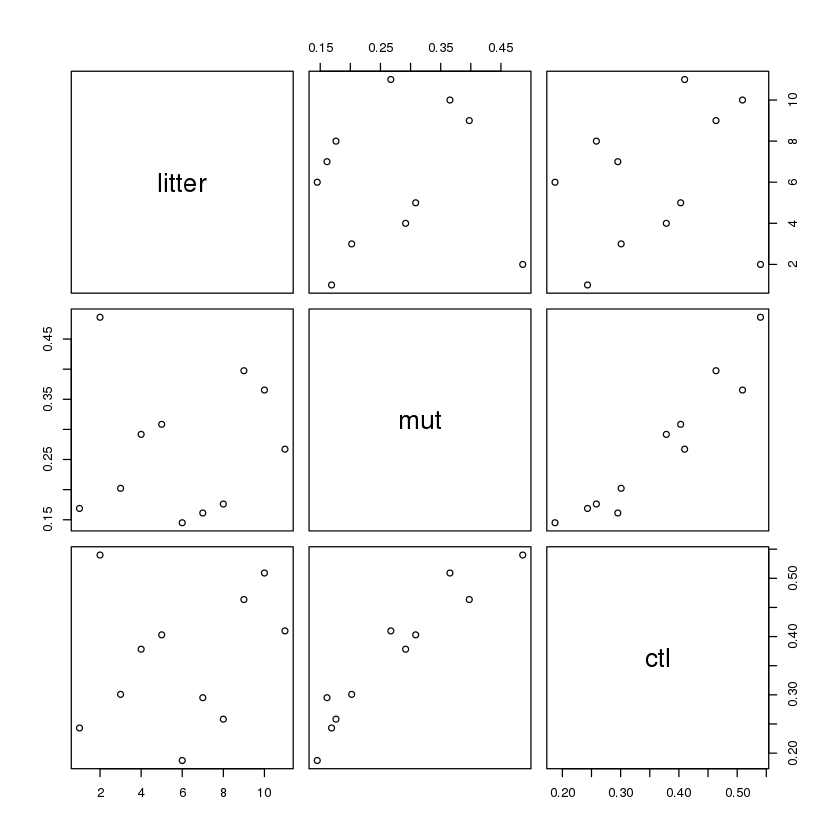

In [5]:
plot(lm)

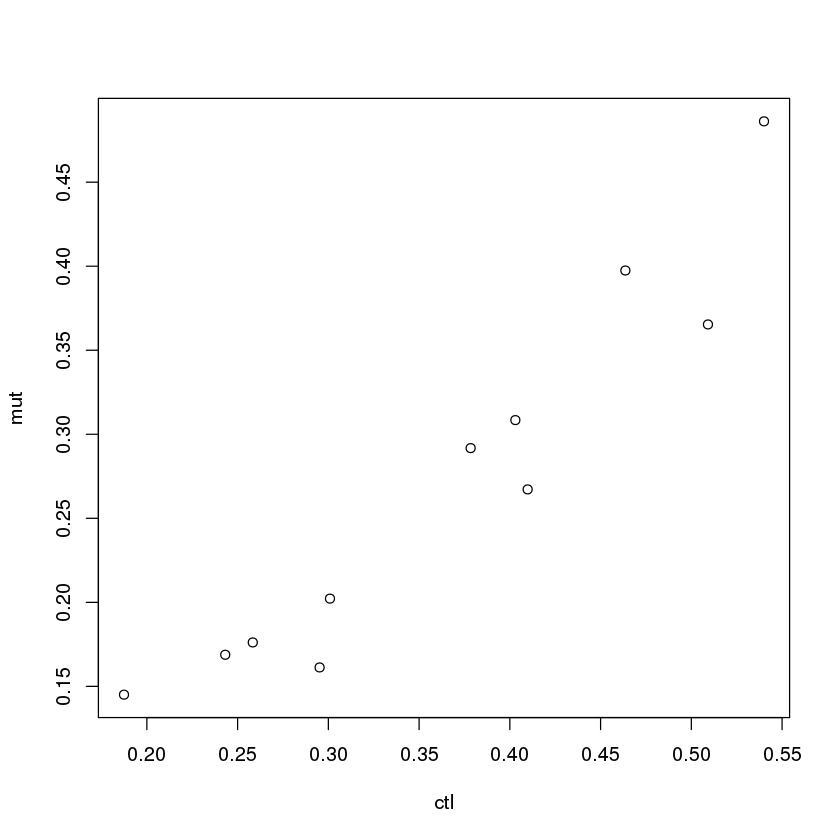

In [6]:
plot(mut~ctl)

#### `abline`
* adds a line at the specified intercepts and slope. 
* can control line type (lty), color (col), etc.

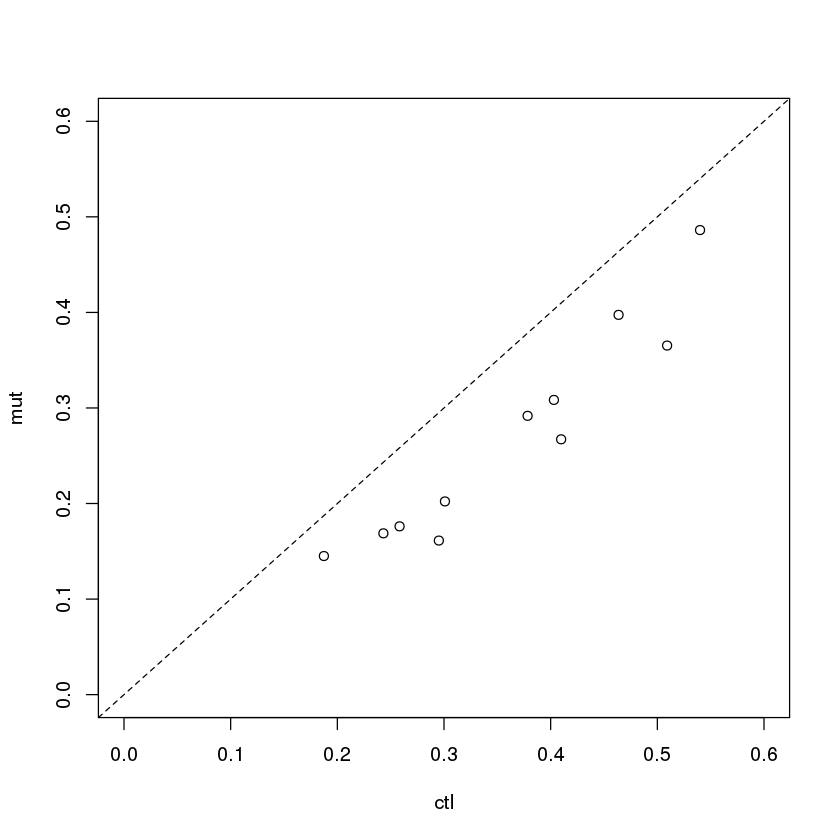

In [7]:
plot(mut~ctl, ylim=c(0,0.6), xlim=c(0,0.6))
abline(0,1,lty=2)

#### F test to compare two variances

In [8]:
var.test(mut,ctl)


	F test to compare two variances

data:  mut and ctl
F = 0.95154, num df = 10, denom df = 10, p-value = 0.9389
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.256012 3.536689
sample estimates:
ratio of variances 
         0.9515434 


#### Shapiro-Wilk normality test (case)

In [9]:
shapiro.test(mut)


	Shapiro-Wilk normality test

data:  mut
W = 0.91835, p-value = 0.3052


#### Shapiro-Wilk normality test (control)

In [10]:
shapiro.test(ctl)


	Shapiro-Wilk normality test

data:  ctl
W = 0.96191, p-value = 0.7952


#### R will perform simple math functions on your data

In [11]:
ctl-mut

[1] 0.07434 0.05383 0.09865 0.08660 0.09459 0.04231 0.13390 0.08218 0.06620
[10] 0.14380 0.14259

#### And perform tests on mathematical expressions from your data

In [12]:
shapiro.test(ctl-mut)


	Shapiro-Wilk normality test

data:  ctl - mut
W = 0.92904, p-value = 0.4013


#### Paired t-test:

In [13]:
t.test(mut,ctl,paired=T)


	Paired t-test

data:  mut and ctl
t = -8.842, df = 10, p-value = 4.851e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.11597910 -0.06929181
sample estimates:
mean of the differences 
            -0.09263545 


#### Welch Two Sample t-test
* Choice of test matters
* Fitting the data structure allows a more powerful test!

In [14]:
t.test(mut,ctl,paired=F)


	Welch Two Sample t-test

data:  mut and ctl
t = -1.9181, df = 19.988, p-value = 0.0695
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.193381649  0.008110739
sample estimates:
mean of x mean of y 
0.2700100 0.3626455 


* * *

## 2. Non-parametric tests for Adamts13 expression from RT-qPCR data

### B6 congenic data:

In [28]:
ad13b<-read.table("adamts_balbF2.txt", header = T)
attach(ad13b)
names(ad13b)
ad13b

The following objects are masked from ad13b (pos = 5):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from ad13b (pos = 6):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from ad13b (pos = 7):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from ad13b (pos = 8):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from ad13b (pos = 9):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from ad13b (pos = 10):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from ad13b (pos = 11):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from ad13b (pos = 13):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2



[1] "id.f2"     "nxf1.f2"   "raw.f2"    "normal.f2" "cohort.f2"

,id.f2,nxf1.f2,raw.f2,normal.f2,cohort.f2
1,EB026,B,7e-05,0.000740424,4/3/09
2,EB211,B,0.00012,0.001157392,4/3/09
3,EB030,B,0.00014,0.001380945,4/3/09
4,EB034,B,0.00022,0.002208735,4/3/09
5,EB319,B,0.00091,0.009084916,4/3/09
6,EB189,B,0.00213,0.001081516,4/15/09
7,EB237,B,0.0031,0.001573233,4/15/09
8,EB279,B,0.00349,0.001772814,4/15/09
9,EB222,B,0.00372,0.001890922,4/15/09
10,EB342,B,0.00214,0.001334754,4/16/09


#### Shapiro-Wilk normality test

In [19]:
shapiro.test(normal[1:6])

ERROR: Error in stopifnot(is.numeric(x)): object 'normal' not found


#### Shapiro-Wilk normality test 

In [20]:
shapiro.test(normal[7:12])

ERROR: Error in stopifnot(is.numeric(x)): object 'normal' not found


#### Wilcoxon rank sum test

In [44]:
wilcox.test(normal[1:6],normal[7:12],paired=F,alternative="less")

ERROR: Error in wilcox.test(normal[1:6], normal[7:12], paired = F, alternative = "less"): object 'normal' not found


#### Plot the data

In [45]:
plot(normal~nxf1)
points(normal~nxf1,col="darkgreen")

ERROR: Error in eval(expr, envir, enclos): object 'normal' not found


ERROR: Error in eval(expr, envir, enclos): object 'normal' not found


### B6 x BALB/c F2 data

In [46]:
ad13f2<-read.table("adamts_balbF2.txt",header=T)
attach(ad13f2)
names(ad13f2)

The following objects are masked from ad13b (pos = 3):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from ad13b (pos = 6):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2



[1] "id.f2"     "nxf1.f2"   "raw.f2"    "normal.f2" "cohort.f2"

#### Shapiro-Wilk normality test

In [47]:
shapiro.test(normal.f2[1:18])


	Shapiro-Wilk normality test

data:  normal.f2[1:18]
W = 0.70643, p-value = 9.494e-05


#### Shapiro-Wilk normality test

In [48]:
shapiro.test(normal.f2[19:30])


	Shapiro-Wilk normality test

data:  normal.f2[19:30]
W = 0.62012, p-value = 0.0001587


#### Wilcoxon rank sum test

In [49]:
wilcox.test(normal.f2[1:18],normal.f2[19:30],paired=F,alternative="less")


	Wilcoxon rank sum test

data:  normal.f2[1:18] and normal.f2[19:30]
W = 32, p-value = 0.0003972
alternative hypothesis: true location shift is less than 0


### Combined normalized data:

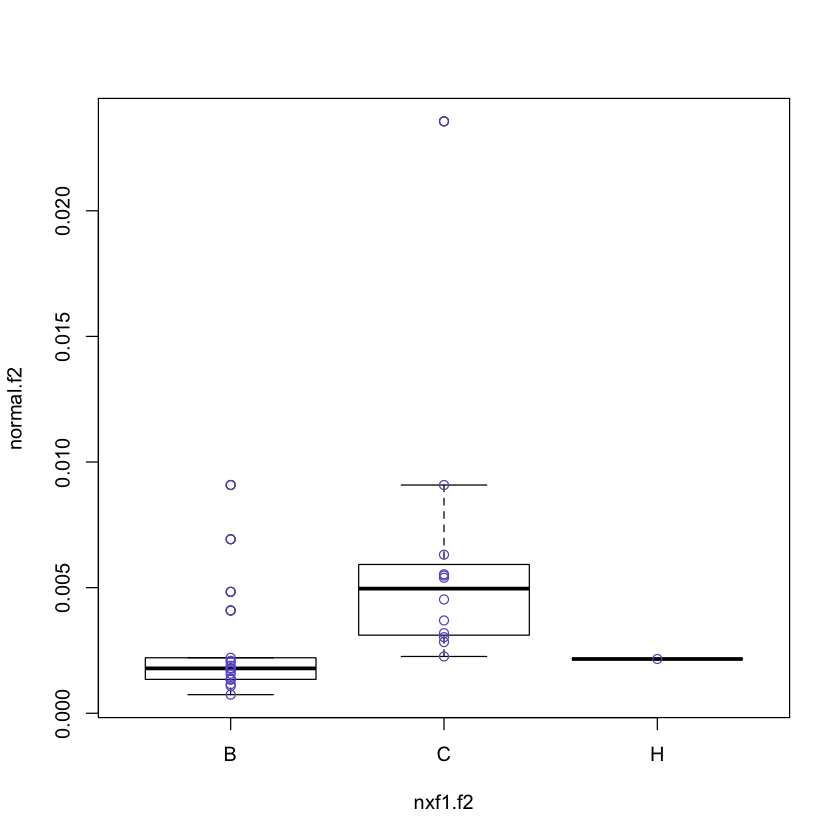

In [50]:
plot(normal.f2~nxf1.f2)
points(normal.f2~nxf1.f2, col="slateblue")

#### Wilcoxon rank sum test

In [51]:
grpB<-c(normal.f2[1:18],normal[1:6])
grpC<-c(normal.f2[19:30],normal[7:12])
wilcox.test(grpB,grpC,paired=F,alternative="less")

ERROR: Error in eval(expr, envir, enclos): object 'normal' not found


ERROR: Error in eval(expr, envir, enclos): object 'normal' not found


ERROR: Error in wilcox.test(grpB, grpC, paired = F, alternative = "less"): object 'grpB' not found


#### Plot the data

In [52]:
boxplot(grpB, grpC)

ERROR: Error in boxplot(grpB, grpC): object 'grpB' not found


## 3. Non-parametric tests with multiple groups

### Luciferase assays for intron 5 variations and deletions

In [53]:
luc<-read.table("luciferase_tests.txt",header=T)
attach(luc)
luc

,ywc_slide,ywc_number,pGL4,rep,Luciferase,Renilla,ratio,nratio
1,17,1,aTAL,1,34788460,9751714,3.56742,1.002852
2,17,1,aTAL,1,31939306,9429163,3.38729,0.952215
3,17,1,aTAL,1,45803328,12322288,3.717112,1.044933
4,17,2,i220_381,1,256638832,5781345,44.39085,12.4789
5,17,2,i220_381,1,318812192,7158609,44.53549,12.51956
6,17,2,i220_381,1,294550368,5991130,49.16441,13.82081
7,17,3,j220_306,1,99829024,8344650,11.96324,3.363035
8,17,3,j220_306,1,95517536,8280495,11.53524,3.24272
9,17,3,j220_306,1,77189288,6313422,12.22622,3.436963
10,17,4,k280_381,1,145908960,9889883,14.75336,4.147377


#### Kruskal-Wallis rank sum test

In [54]:
kruskal.test(nratio~pGL4)


	Kruskal-Wallis rank sum test

data:  nratio by pGL4
Kruskal-Wallis chi-squared = 88.405, df = 10, p-value = 1.109e-14


* * *

([Return to top.](#Mann-Whitney))

* * *